<a href="https://colab.research.google.com/github/Anna4142/Gans/blob/main/celeblookalike.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import scipy.io
import numpy as np

from datetime import datetime, timedelta
import time

import tensorflow as tf

import keras
import keras.utils as image
from keras.callbacks import ModelCheckpoint,EarlyStopping
from keras.layers import Dense, Activation, Dropout, Flatten, Input, Convolution2D, ZeroPadding2D, MaxPooling2D, Activation
from keras.layers import Conv2D, AveragePooling2D
from keras.models import Model, Sequential
from keras import metrics
from keras.models import model_from_json

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

import cv2

import pandas as pd
"""import ray
ray.init(plasma_directory="/workspaces/96273/temp")
import modin.pandas as pd"""

'import ray\nray.init(plasma_directory="/workspaces/96273/temp")\nimport modin.pandas as pd'

In [ ]:
#if you have multiple GPUs, use this block to avoid allocate all GPUs and all memory.

import os
os.environ["CUDA_VISIBLE_DEVICES"]="1"

import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from keras import backend as K
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
session = tf.Session(config=config)
K.set_session(session)

Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
#VGG-Face for face recognition: https://sefiks.com/2018/08/06/deep-face-recognition-with-keras/

def loadVggFaceModel():
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))

    model.add(Convolution2D(4096, (7, 7), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(4096, (1, 1), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(2622, (1, 1)))
    model.add(Flatten())
    model.add(Activation('softmax'))
    
    vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)
    
    return vgg_face_descriptor

In [ ]:
model = loadVggFaceModel()

In [ ]:
!pip install --upgrade --no-cache-dir gdown
!gdown --id  1tQGrH9BczlfxJX3uf-PEnu07Hllo2frz


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.6.4
    Uninstalling gdown-4.6.4:
      Successfully uninstalled gdown-4.6.4
/usr/local/lib/python3.9/dist-packages/gdown/cli.py:126: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (uriginal): https://drive.google.com/uc?id=1tQGrH9BczlfxJX3uf-PEnu07Hllo2frz
From (redirected): https://drive.google.com/uc?id=1tQGrH9BczlfxJX3uf-PEnu07Hllo2frz&confirm=t&uuid=5aeac0da-8e90-45af-9d47-d34b0dfc0525
To: /content/vgg_face_weights.h5
100% 580M/580M [00:07<00:00, 76.0MB/s]


In [ ]:
from keras.models import model_from_json
model.load_weights('/content/vgg_face_weights.h5')

In [ ]:
#open-cv's face detection module

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [ ]:
#!gdown --id 1AOiwpwDMc_6dgvqBzNaTk4X91AjgV-uY

In [ ]:
!gdown --id 1VVTJCn0UM2hqRZvLGEjrPJCMSxOn7_D6

/usr/local/lib/python3.9/dist-packages/gdown/cli.py:126: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (uriginal): https://drive.google.com/uc?id=1VVTJCn0UM2hqRZvLGEjrPJCMSxOn7_D6
From (redirected): https://drive.google.com/uc?id=1VVTJCn0UM2hqRZvLGEjrPJCMSxOn7_D6&confirm=t&uuid=2b98ee07-3645-4bea-a4a3-6a4d59a38afe
To: /content/wikifaces.tar
100% 3.16G/3.16G [00:24<00:00, 131MB/s]


In [ ]:
!tar -xvf 'wikifaces.tar' -C '/content'  

Streaming output truncated to the last 5000 lines.
wiki/50/8653450_1985-11-28_2014.jpg
wiki/50/28040650_1986-04-20_2011.jpg
wiki/50/1896450_1928-03-22_1990.jpg
wiki/50/39477450_1965-01-04_2014.jpg
wiki/50/17106250_1950-02-23_2010.jpg
wiki/50/17508150_1986-04-22_2012.jpg
wiki/50/15701850_1986-04-15_2010.jpg
wiki/50/28037450_1934-07-09_2002.jpg
wiki/50/14040750_1989-10-04_2008.jpg
wiki/50/28991050_1964-08-19_2010.jpg
wiki/50/27962750_1894-03-20_1946.jpg
wiki/50/29127850_1923-11-05_2007.jpg
wiki/50/33309450_1989-04-27_2012.jpg
wiki/50/20291650_1987-02-18_2014.jpg
wiki/50/2529850_1922-12-05_1966.jpg
wiki/50/42305150_1954-07-11_1950.jpg
wiki/50/22659150_1890-11-01_1962.jpg
wiki/50/29569950_1978-04-28_1999.jpg
wiki/50/7720450_1956-07-18_2010.jpg
wiki/50/7973150_1985-10-07_2009.jpg
wiki/50/2744250_1981-01-17_2010.jpg
wiki/50/166450_1927-06-15_1989.jpg
wiki/50/35796450_1936-01-21_1973.jpg
wiki/50/43761250_1941-04-20_1960.jpg
wiki/50/38389550_1970-03-25_1996.jpg
wiki/50/683150_1986-06-27_2007.j

In [ ]:
# Ref https://data.vision.ee.ethz.ch/cvl/rrothe/imdb-wiki/
# https://data.vision.ee.ethz.ch/cvl/rrothe/imdb-wiki/static/imdb_crop.tar
mat = scipy.io.loadmat('/content/wiki/wiki.mat')

In [ ]:
columns = ["dob", "photo_taken", "full_path", "gender", "name", "face_location", "face_score", "second_face_score", "celeb_names", "celeb_id"]

In [ ]:
instances = mat['wiki'][0][0][0].shape[1]

In [ ]:
df = pd.DataFrame(index = range(0,instances), columns = columns)

In [ ]:
df.shape

(62328, 10)

In [ ]:
for i in mat:
    if i == "wiki":
        current_array = mat[i][0][0]
        for j in range(len(current_array)):
            #print(j,". ",columns[j],": ",current_array[j][0])
            df[columns[j]] = pd.DataFrame(current_array[j][0])

In [ ]:
df.head()

,dob,photo_taken,full_path,gender,name,face_location,face_score,second_face_score,celeb_names,celeb_id
0,723671,2009,[17/10000217_1981-05-05_2009.jpg],1.0,[Sami Jauhojärvi],"[[111.29109473290997, 111.29109473290997, 252....",4.300962,NaN,NaN,NaN
1,703186,1964,[48/10000548_1925-04-04_1964.jpg],1.0,[Dettmar Cramer],"[[252.48330229530742, 126.68165114765371, 354....",2.645639,1.949248,NaN,NaN
2,711677,2008,[12/100012_1948-07-03_2008.jpg],1.0,[Marc Okrand],"[[113.52, 169.83999999999997, 366.08, 422.4]]",4.329329,NaN,NaN,NaN
3,705061,1961,[65/10001965_1930-05-23_1961.jpg],1.0,[Aleksandar Matanović],"[[1, 1, 634, 440]]",-inf,NaN,NaN,NaN
4,720044,2012,[16/10002116_1971-05-31_2012.jpg],0.0,[Diana Damrau],"[[171.61031405173117, 75.57451239763239, 266.7...",3.408442,NaN,NaN,NaN


In [ ]:
#remove pictures does not include face
df = df[df['face_score'] != -np.inf]

#some pictures include more than one face, remove them
df = df[df['second_face_score'].isna()]

#check threshold
df = df[df['face_score'] >= 3]

In [ ]:
df.shape #95234

(22596, 10)

In [ ]:
def extractNames(name):
     if not name: # check if name is empty
        return None # return None if name is empty
     return name[0]

In [ ]:
df['celebrity_name'] = df['name'].apply(extractNames)

<ipython-input-61-119faea3bcc6>:2: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if not name: # check if name is empty


In [ ]:
df.head()

,full_path,gender,name,celeb_names,celeb_id,celebrity_name,pixels,face_vector_raw,similarity
0,[17/10000217_1981-05-05_2009.jpg],1.0,[Sami Jauhojärvi],NaN,NaN,Sami Jauhojärvi,"[[[240, 252, 252], [240, 252, 252], [240, 252,...","[0.019087205, -0.000827568, 0.0008968947, 0.01...",10
41736,[64/26667064_1989-02-28_2014.jpg],0.0,[Angelababy],NaN,NaN,Angelababy,"[[[241, 218, 223], [241, 218, 222], [241, 218,...","[0.0042215027, 0.0064439033, -0.003777452, 0.0...",10
41734,[48/266648_1953-04-24_2007.jpg],1.0,[Eric Bogosian],NaN,NaN,Eric Bogosian,"[[[217, 222, 220], [211, 216, 214], [204, 209,...","[0.011535751, 0.0090501625, 0.0011403337, 0.01...",10
41731,[12/26658712_1954-05-28_1970.jpg],1.0,[Richie Panch],NaN,NaN,Richie Panch,"[[[220, 236, 243], [220, 236, 243], [220, 236,...","[0.005578165, 0.013873426, 0.008879956, -0.004...",10
41730,[31/26657331_1980-12-27_2015.jpg],0.0,[Elizabeth Rodriguez],NaN,NaN,Elizabeth Rodriguez,"[[[233, 191, 148], [234, 192, 149], [236, 194,...","[-0.0087921, 0.01629317, 0.005434443, 0.023509...",10


In [ ]:
df.shape

(22596, 9)

In [ ]:
df = df.drop(columns = ['dob', 'photo_taken', 'face_location', 'face_score', 'second_face_score'])

##load image path

In [ ]:
def getImagePixels(image_path):
    return cv2.imread("/content/wiki/%s" % image_path[0]) #pixel values in scale of 0-255

In [ ]:
tic = time.time()
df['pixels'] = df['full_path'].apply(getImagePixels)
toc = time.time()

print("this block completed in ",toc-tic," seconds...") #562.80 seconds

this block completed in  72.06304788589478  seconds...


##represent image as vectors

In [ ]:
def findFaceRepresentation(img):
    detected_face = img
    #plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    
    #-----------------------------
    """
    faces = face_cascade.detectMultiScale(img, 1.3, 5)

    for (x,y,w,h) in faces:
        detected_face = img[int(y):int(y+h), int(x):int(x+w)]

        try:
            margin = 10
            margin_x = int((w * margin)/100); margin_y = int((h * margin)/100)
            detected_face = img[int(y-margin_y):int(y+h+margin_y), int(x-margin_x):int(x+w+margin_x)]
        except:
            print("detected face has no margin")
    """
    #-----------------------------
    
    try: 
        detected_face = cv2.resize(detected_face, (224, 224))
        #plt.imshow(cv2.cvtColor(detected_face, cv2.COLOR_BGR2RGB))
        
        #normalize detected face in scale of -1, +1

        img_pixels = image.img_to_array(detected_face)
        img_pixels = np.expand_dims(img_pixels, axis = 0)
        img_pixels /= 127.5
        img_pixels -= 1
        
        representation = model.predict(img_pixels)[0,:]
    except:
        representation = None
        
    return representation  

In [ ]:
tic = time.time()
df['face_vector_raw'] = df['pixels'].apply(findFaceRepresentation) #vector for raw image

toc = time.time()

print("this block completed in ",toc-tic," seconds...")

this block completed in  6558.429414272308  seconds...


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/My Drive/df_celeb.csv'
with open(path, 'w', encoding = 'utf-8-sig') as f:
  df.to_csv(f)

MessageError: ignored

In [ ]:
print(type(df['face_vector_raw']))

<class 'pandas.core.series.Series'>


In [ ]:
df.head(1)

,full_path,gender,name,celeb_names,celeb_id,celebrity_name,pixels,face_vector_raw,similarity,sim
46077,[64/1374864_1928-03-24_1951.jpg],0.0,[Vanessa Brown],NaN,NaN,Vanessa Brown,"[[[191, 191, 191], [192, 192, 192], [193, 193,...","[0.012795489, 0.016051395, 0.008427021, -0.007...",0.981271,"Tensor(""Reshape_16550:0"", shape=(1, 1), dtype=..."


##load ur photo

In [ ]:
#!gdown --id 1TbzROGflBxOLc_Yc4D7T1cZUA74RJSCU
#!gdown --id 1ypDT2TIJqZS7pJcD4TXsjWb-sr7bOA2N
!gdown --id 1zjEzxQ3APKI1dvkX78Wnk7cTr2ramc3b

/usr/local/lib/python3.9/dist-packages/gdown/cli.py:126: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1zjEzxQ3APKI1dvkX78Wnk7cTr2ramc3b
To: /content/Photo from Anushka.jpg
100% 79.8k/79.8k [00:00<00:00, 84.5MB/s]


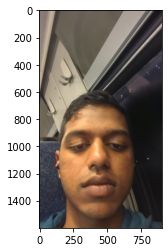

In [ ]:

#img = cv2.imread("/content/testphoto.jpg") #pixel values in scale of 0-255
img = cv2.imread("/content/wagh.jpg") #pixel values in scale of 0-255
#img = cv2.imread("sefik_2.jpg") #pixel values in scale of 0-255


plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

faces = face_cascade.detectMultiScale(img, 1.3, 5)

for (x,y,w,h) in faces:
    detected_face = img[int(y):int(y+h), int(x):int(x+w)]
    
    #cv2.rectangle(img,(x,y),(x+w,y+h),(128,128,128),cv2.FILLED)
    #plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    
    #add 15% margin around the face
    try:
        margin = 10
        margin_x = int((w * margin)/100); margin_y = int((h * margin)/100)
        detected_face = img[int(y-margin_y):int(y+h+margin_y), int(x-margin_x):int(x+w+margin_x)]
    except:
        print("detected face has no margin")
    
    detected_face = cv2.resize(detected_face, (224, 224))

#plt.imshow(detected_face)
#plt.imshow(cv2.cvtColor(detected_face, cv2.COLOR_BGR2RGB))

In [ ]:
img_pixels = image.img_to_array(detected_face)
img_pixels = np.expand_dims(img_pixels, axis = 0)
img_pixels /= 127.5
img_pixels -= 1

In [ ]:


yourself_representation = model(img_pixels)[0,:]


In [ ]:
yourself_representation=findFaceRepresentation(detected_face)
print(type(yourself_representation))

<class 'numpy.ndarray'>


##find similarities

In [ ]:

def findCosineSimilarity(source_representation, test_representation=yourself_representation):
       try:
        a = np.matmul(np.transpose(source_representation), test_representation)
        b = np.sum(np.multiply(source_representation, source_representation))
        c = np.sum(np.multiply(test_representation, test_representation))
        return 1 - (a / (np.sqrt(b) * np.sqrt(c)))
       except:
        return 10 #assign a large value. similar faces will have small value.

In [ ]:
df['similarity'] = df['face_vector_raw'].apply(findCosineSimilarity)

In [ ]:
df.head(1)

,full_path,gender,name,celeb_names,celeb_id,celebrity_name,pixels,face_vector_raw,similarity,sim
56758,[36/3098836_1980-12-13_2015.jpg],1.0,[Satoshi Tsumabuki],NaN,NaN,Satoshi Tsumabuki,"[[[248, 250, 250], [248, 250, 250], [247, 249,...","[0.027828662, 0.02112973, 0.0226118, 0.0107386...",0.560523,"Tensor(""Reshape_20554:0"", shape=(1, 1), dtype=..."


In [ ]:
df = df.sort_values(by=['similarity'], ascending=True)

In [ ]:
df.head(1)

,full_path,gender,name,celeb_names,celeb_id,celebrity_name,pixels,face_vector_raw,similarity,sim
62068,[77/39908577_1989-03-06_2014.jpg],1.0,[Dwight Buycks],NaN,NaN,Dwight Buycks,"[[[135, 47, 117], [137, 49, 119], [140, 52, 12...","[0.024227845, 0.0074885124, 0.00026973535, 0.0...",0.263603,"Tensor(""Reshape_22474:0"", shape=(1, 1), dtype=..."


0 . Dwight Buycks  ( 0.2636033892631531 ) -  77/39908577_1989-03-06_2014.jpg


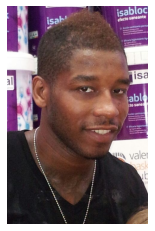

-------------------------
1 . Michael Reiziger  ( 0.2687785029411316 ) -  15/756415_1973-05-03_2013.jpg


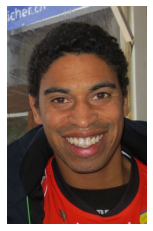

-------------------------
2 . Anthony Bennett  ( 0.2699136734008789 ) -  27/33940227_1993-03-14_2013.jpg


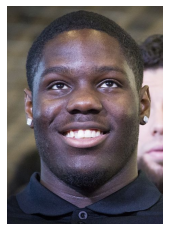

-------------------------
3 . Jayson Mansaray  ( 0.28175681829452515 ) -  15/29346415_1986-08-17_2010.jpg


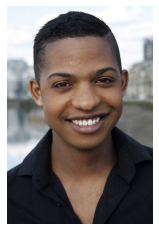

-------------------------
4 . Cenk Uygur  ( 0.28473031520843506 ) -  21/3111921_1970-03-21_2010.jpg


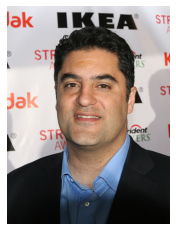

-------------------------
5 . Jay Z  ( 0.2956366539001465 ) -  70/162870_1969-12-04_2011.jpg


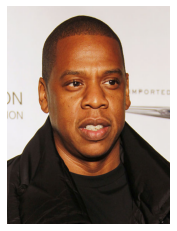

-------------------------
6 . Hornswoggle  ( 0.2956557869911194 ) -  30/5059130_1986-05-29_2015.jpg


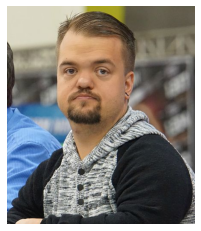

-------------------------


In [ ]:
#this block might show different pictures of same actors
if True:
    for i in range(0, 7):
        instance = df.iloc[i]
        name = instance['celebrity_name']
        similarity = instance['similarity']
        
        #img = instance['pixels']
        full_path = instance['full_path'][0]
        img = cv2.imread("wiki/%s" % full_path)
        
        print(i,".",name," (",similarity,") - ",full_path)

        plt.axis('off')
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.show()

        print("-------------------------")

In [ ]:
pivot_df = df.drop_duplicates(subset ="celebrity_name")
#pivot_df = pivot_df[pivot_df['photo_taken'] >= 2000]

#0: woman, 1: man. if you know the gender of your target image, then you can filter data set and it fasten system
pivot_df = pivot_df[pivot_df['gender'] == 1]

pivot_df = pivot_df.reset_index()

Dwight Buycks  ( 73.63966107368469 %) -  77/39908577_1989-03-06_2014.jpg


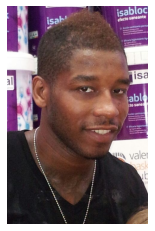

-------------------------
Michael Reiziger  ( 73.12214970588684 %) -  15/756415_1973-05-03_2013.jpg


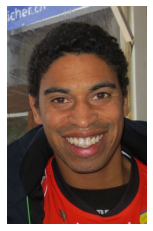

-------------------------
Anthony Bennett  ( 73.00863265991211 %) -  27/33940227_1993-03-14_2013.jpg


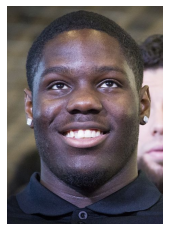

-------------------------
Jayson Mansaray  ( 71.82431817054749 %) -  15/29346415_1986-08-17_2010.jpg


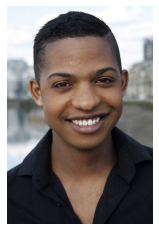

-------------------------


In [ ]:
for i in range(0, 4):
    instance = pivot_df.iloc[i]
    name = instance['celebrity_name']
    similarity = instance['similarity']
    
    similarity = (1 - similarity)*100
    
    #img = instance['pixels']
    full_path = instance['full_path'][0]
    img = cv2.imread("wiki/%s" % full_path)
    #path to your image
    img_original=cv2.imread("/content/wagh.jpg") 
 
    # Set the weights for each image
    alpha = 0.5
    beta = 1 - alpha
    # Blend the images using a weighted sum
    blended_img = cv2.addWeighted(img, alpha, img_original, beta, 0.0)

    # Show the blended image
    
    fig = plt.figure(figsize=(10, 10))
    print(name," (",similarity,"%) - ",full_path)
    rows=1
    columns=3
    
    fig.add_subplot(rows, columns, 1)
    plt.imshow(img_original)
    plt.show()
    plt.axis('off')

    fig.add_subplot(rows, columns, 2)
    plt.imshow( blended_img) 
    plt.show()
    plt.axis('off')

    
    fig.add_subplot(rows, columns, 3)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()
    plt.axis('off')
    
    print("-------------------------")

##check similarity with a specific celebrity

200 .  Mohamed Atta  ( 62.09248900413513 ) -  87/20487_1968-09-01_2001.jpg


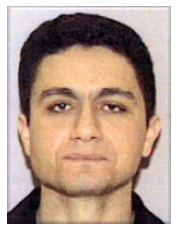

In [ ]:

target = pivot_df[pivot_df['celebrity_name'] == 'Mohamed Atta']

for index, instance in target.iterrows():
    name = instance['celebrity_name']
    similarity = instance['similarity']
    full_path = instance['full_path'][0]

    similarity = (1 - similarity)*100
    
    print(index,". ", name," (",similarity,") - ",full_path)

    img = cv2.imread("wiki/%s" % full_path)
    
    plt.axis('off')
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()